In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import csv

from config import census_api_key
from pprint import pprint

In [2]:
# Save config information
url1 = 'https://api.census.gov/data/2000/pep/int_population?get='

# Build query URL
query_url1 = url1 + "POP,GEONAME&for=COUNTY:109&in=state:51&DATE=6,7,8,9,10,11&key=" + census_api_key
response1 = requests.get(query_url1)
response_json1 = response1.json()
print(response_json1)

[['POP', 'GEONAME', 'DATE', 'state', 'county'], ['28582', 'Louisa County, Virginia', '6', '51', '109'], ['29835', 'Louisa County, Virginia', '7', '51', '109'], ['30946', 'Louisa County, Virginia', '8', '51', '109'], ['31716', 'Louisa County, Virginia', '9', '51', '109'], ['32475', 'Louisa County, Virginia', '10', '51', '109'], ['32840', 'Louisa County, Virginia', '11', '51', '109']]


In [3]:
# Convert to DataFrame
louisa_df1 = pd.DataFrame(response_json1)

# String replace index
new_header = louisa_df1.iloc[0]
louisa_df1 = louisa_df1[1:]
louisa_df1.columns = new_header
louisa_df1

,POP,GEONAME,DATE,state,county
1,28582,"Louisa County, Virginia",6,51,109
2,29835,"Louisa County, Virginia",7,51,109
3,30946,"Louisa County, Virginia",8,51,109
4,31716,"Louisa County, Virginia",9,51,109
5,32475,"Louisa County, Virginia",10,51,109
6,32840,"Louisa County, Virginia",11,51,109


In [4]:
# Save config information
url2 = 'https://api.census.gov/data/2017/pep/population?get='

# Build query URL
query_url2 = url2 + "POP,GEONAME&for=COUNTY:109&in=state:51&DATE=3,4,5,6,7,8&key=" + census_api_key
response2 = requests.get(query_url2)
response_json2 = response2.json()
print(response_json2)

[['POP', 'GEONAME', 'DATE', 'state', 'county'], ['33310', 'Louisa County, Virginia', '3', '51', '109'], ['33461', 'Louisa County, Virginia', '4', '51', '109'], ['33499', 'Louisa County, Virginia', '5', '51', '109'], ['33993', 'Louisa County, Virginia', '6', '51', '109'], ['34319', 'Louisa County, Virginia', '7', '51', '109'], ['34618', 'Louisa County, Virginia', '8', '51', '109']]


In [5]:
# Convert to DataFrame
louisa_df2 = pd.DataFrame(response_json2)

# String replace index
new_header = louisa_df2.iloc[0]
louisa_df2 = louisa_df2[1:]
louisa_df2.columns = new_header
louisa_df2

,POP,GEONAME,DATE,state,county
1,33310,"Louisa County, Virginia",3,51,109
2,33461,"Louisa County, Virginia",4,51,109
3,33499,"Louisa County, Virginia",5,51,109
4,33993,"Louisa County, Virginia",6,51,109
5,34319,"Louisa County, Virginia",7,51,109
6,34618,"Louisa County, Virginia",8,51,109


In [6]:
# Rename headers
louisa_df1 = louisa_df1.rename(columns={'POP': 'Population',
                                        'GEONAME': 'County, State',
                                        'DATE': 'Year',
                                        'state': 'State',
                                        'county': 'County'})
louisa_df1

,Population,"County, State",Year,State,County
1,28582,"Louisa County, Virginia",6,51,109
2,29835,"Louisa County, Virginia",7,51,109
3,30946,"Louisa County, Virginia",8,51,109
4,31716,"Louisa County, Virginia",9,51,109
5,32475,"Louisa County, Virginia",10,51,109
6,32840,"Louisa County, Virginia",11,51,109


In [7]:
# Rename headers
louisa_df2 = louisa_df2.rename(columns={'POP': 'Population',
                                        'GEONAME': 'County, State',
                                        'DATE': 'Year',
                                        'state': 'State',
                                        'county': 'County'})
louisa_df2

,Population,"County, State",Year,State,County
1,33310,"Louisa County, Virginia",3,51,109
2,33461,"Louisa County, Virginia",4,51,109
3,33499,"Louisa County, Virginia",5,51,109
4,33993,"Louisa County, Virginia",6,51,109
5,34319,"Louisa County, Virginia",7,51,109
6,34618,"Louisa County, Virginia",8,51,109


In [8]:
# Replace values
louisa_df1['Year'] = louisa_df1['Year'].replace({'6':'2004', '7':'2005', '8':'2006', '9':'2007', '10':'2008', '11':'2009'})
louisa_df1["Year"] = pd.to_numeric(louisa_df1["Year"])
louisa_df1["Population"] = pd.to_numeric(louisa_df1["Population"])
louisa_df1

,Population,"County, State",Year,State,County
1,28582,"Louisa County, Virginia",2004,51,109
2,29835,"Louisa County, Virginia",2005,51,109
3,30946,"Louisa County, Virginia",2006,51,109
4,31716,"Louisa County, Virginia",2007,51,109
5,32475,"Louisa County, Virginia",2008,51,109
6,32840,"Louisa County, Virginia",2009,51,109


In [9]:
# Replace values
louisa_df2['Year'] = louisa_df2['Year'].replace({'3':'2010', '4':'2011', '5':'2012', '6':'2013', '7':'2014', '8':'2015'})
louisa_df2["Year"] = pd.to_numeric(louisa_df2["Year"])
louisa_df2["Population"] = pd.to_numeric(louisa_df2["Population"])
louisa_df2

,Population,"County, State",Year,State,County
1,33310,"Louisa County, Virginia",2010,51,109
2,33461,"Louisa County, Virginia",2011,51,109
3,33499,"Louisa County, Virginia",2012,51,109
4,33993,"Louisa County, Virginia",2013,51,109
5,34319,"Louisa County, Virginia",2014,51,109
6,34618,"Louisa County, Virginia",2015,51,109


In [10]:
# Remove columns
louisa_df1.drop(columns=['State', 'County'])

,Population,"County, State",Year
1,28582,"Louisa County, Virginia",2004
2,29835,"Louisa County, Virginia",2005
3,30946,"Louisa County, Virginia",2006
4,31716,"Louisa County, Virginia",2007
5,32475,"Louisa County, Virginia",2008
6,32840,"Louisa County, Virginia",2009


In [11]:
# Remove columns
louisa_df2.drop(columns=['State', 'County'])

,Population,"County, State",Year
1,33310,"Louisa County, Virginia",2010
2,33461,"Louisa County, Virginia",2011
3,33499,"Louisa County, Virginia",2012
4,33993,"Louisa County, Virginia",2013
5,34319,"Louisa County, Virginia",2014
6,34618,"Louisa County, Virginia",2015


In [12]:
# Combine DataFrames
louisa_df = pd.concat([louisa_df1, louisa_df2])
louisa_df

,Population,"County, State",Year,State,County
1,28582,"Louisa County, Virginia",2004,51,109
2,29835,"Louisa County, Virginia",2005,51,109
3,30946,"Louisa County, Virginia",2006,51,109
4,31716,"Louisa County, Virginia",2007,51,109
5,32475,"Louisa County, Virginia",2008,51,109
6,32840,"Louisa County, Virginia",2009,51,109
1,33310,"Louisa County, Virginia",2010,51,109
2,33461,"Louisa County, Virginia",2011,51,109
3,33499,"Louisa County, Virginia",2012,51,109
4,33993,"Louisa County, Virginia",2013,51,109


In [13]:
# Remove columns
louisa_df.drop(columns=['State', 'County'])

,Population,"County, State",Year
1,28582,"Louisa County, Virginia",2004
2,29835,"Louisa County, Virginia",2005
3,30946,"Louisa County, Virginia",2006
4,31716,"Louisa County, Virginia",2007
5,32475,"Louisa County, Virginia",2008
6,32840,"Louisa County, Virginia",2009
1,33310,"Louisa County, Virginia",2010
2,33461,"Louisa County, Virginia",2011
3,33499,"Louisa County, Virginia",2012
4,33993,"Louisa County, Virginia",2013


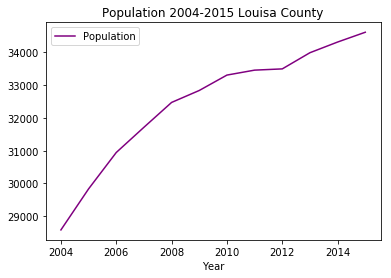

In [14]:
# Plot the graph
plot = louisa_df.plot(x='Year', y='Population', kind='line', title='Population 2004-2015 Louisa County', legend=True, color='purple')

In [15]:
# Save in PNG
fig = plot.get_figure()
fig.savefig('Population_2004-2015_Louisa_County.png')